In [1]:
from os import error
import numpy as np
from fastai.tabular.all import *

Total Images: 2418
Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


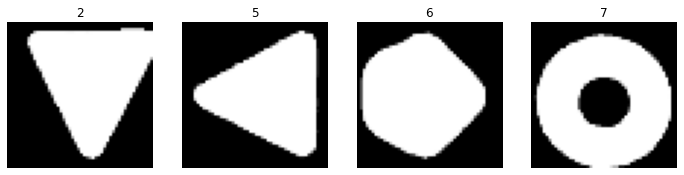

In [3]:
path = Path("imgs")
fnames = get_image_files(path)
print(f"Total Images: {len(fnames)}")
def label_func(x): return x.parent.name
dls = ImageDataLoaders.from_path_func(path, fnames, label_func)
dls.valid.show_batch(max_n=4, nrows=1)

0.0010000000474974513


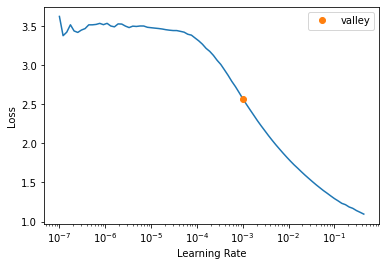

In [4]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
lr_min = learn.lr_find()
print(lr_min[0])

In [5]:
learn.fine_tune(10, base_lr=lr_min[0])


epoch,train_loss,valid_loss,error_rate,time
0,1.160248,0.110670,0.024845,00:03


epoch,train_loss,valid_loss,error_rate,time
0,0.043669,0.001149,0.000000,00:02
1,0.021738,0.000139,0.000000,00:02
2,0.012145,0.000074,0.000000,00:02
3,0.011793,0.000119,0.000000,00:02
4,0.007339,0.000027,0.000000,00:02
5,0.004400,0.000012,0.000000,00:02
6,0.002466,0.000009,0.000000,00:02
7,0.001426,0.000009,0.000000,00:02
8,0.001008,0.000007,0.000000,00:02
9,0.000675,0.000007,0.000000,00:02


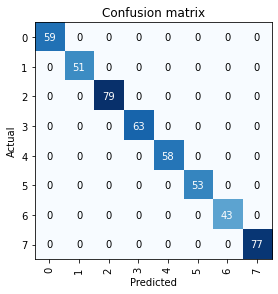

In [6]:
learn.export("shape_detection.ai")
learn.save("shape_detection")
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [7]:
result = learn.predict(cv2.imread("C:/Users/Dennis Wuitz/Desktop/imgs/3/0003.png"))
print(result[0])

AssertionError: Expected an input of type in 
  - <class 'pathlib.WindowsPath'>
  - <class 'pathlib.Path'>
  - <class 'str'>
  - <class 'torch.Tensor'>
  - <class 'numpy.ndarray'>
  - <class 'bytes'>
  - <class 'fastai.vision.core.PILImage'>
 but got <class 'NoneType'>